# Detecting the Presence of Heart Disease

#### Gregory Van

## The Data Set

The dataset used is the Cleveland Heart Disease database from the UCI Repository and can be viewed and downloaded here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease. This dataset uses a subset of 14 out of originally 76 attributes that is part of a much larger dataset. Of the 14 attributes, 13 will be used as characteristic predictors for classifying whether or not there is presence of heart disease. The other attribute is the labels for the dataset which consist of 5 integer classes from 0 to 4 where 0 is no presence of heart disease and 1 through 4 is varying presences of heart disease. In this project we will only classify whether or not there is any presence of heart disease, hence we grouped the labels 1 through 4 into one single value of “1” so that the label is will be binary, which is described more in the “Map Data” section. 

The 14 attributes that will be used in this dataset are:
1.	Age: in years
2.	Sex: 1 = male; 0 = female
3.	Chest Pain (cp): type
a.	Value 1: typical angina
b.	Value 2: atypical angina
c.	Value 3: non-anginal pain
d.	Value 4: asymptomatic
4.	Resting Blood Pressure (trestbps): in mm Hg on admission to the hospital
5.	Serum Cholestoral (chol): in mg/dl
6.	Fasting Blood Sugar > 120 mg/dl (fbs): 1 = true; 0 = false
7.	Resting Electrocardiographic (restecg): results
a.	Value 0: normal 
b.	Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
c.	Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.	Maximum Heart Rate Achieved (thalach): value
9.	Exercise Induced Angina (exang): 1 = yes; 0 = no
10.	ST Depression (oldpeak): induced by exercise relative to rest
11.	Slope of the Peak Exercise ST Segment (slope): 1, 2, or 3
12.	Number of Major Vessels (ca): 0-3 colored by flourosopy
13.	Thalassemia (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	Diagnosis of Heart Disease (num): angiographic disease status 0-4; ground truth labels


## Importing Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Data location
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url, header=None, na_values='?')

## Inspecting the Raw Data

In [3]:
print(data)

       0    1    2      3      4    5    6      7    8    9    10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0  NaN  3.0   

     13  
0     0  
1     2  
2     1  
3     0  
4

In [4]:
# Set the title of all features
feature_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data.columns = feature_names

In [5]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [6]:
# See how the data is split for the labels in the num column
print("Number of Occurences:\n", data.num.value_counts())

Number of Occurences:
 0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64


## Preprocessing the Data

### Missing Values
First we will check if our dataset has missing values. If it does, then we will have to deal with them.

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Since we only have 6 values that have missing values, we will just drop those  rows of data that contain the missing values.

In [8]:
# Drop rows that have missing values in them.
data = data.dropna()
print(data.shape)

(297, 14)


### Map Data

To make the classification a bit easier, we will create a binary model that detects whether or not there is any presence of heart disease. To do that we will map (group) target values of 1-4 as 1 which indicates that there is some presence of heart disease.

In [9]:
# Map target values of 1-4 as 1
data['num'] = data.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
print("Number of Occurences:\n", data.num.value_counts())

Number of Occurences:
 0    160
1    137
Name: num, dtype: int64


### Categorical Features

Some of the categorical features have numerical values but they should not have a hierarchical ranking to them. In order to avoid having our models misinterpret the data as having a hierarchy, we will use an one hot encode method.

In our dataset, the multi-label categorical features are Chest pain type (cp), Resting electrocardiography results (restecg), Slope of peak exercise ST segment (slope) and Thalium stress test result (thal). Of these features, restecg, slope and thal do not have a hierarchy.

In [10]:
# First we need to split the data into dependent (X) variables and independent variable (y).
X = data.loc[:,'age':'thal']# Features used to train the model
y = data.num # Target variable
print(X.shape)
print(y.shape)

(297, 13)
(297,)


In [11]:
# To achieve categorical data encoding, we will use the get_dummies() Pandas method. 
# Note that this is done before splitting the data into train/test so that we do not have any chance of unknown categories after the split.
X = pd.get_dummies(X, columns = ['restecg', 'slope', 'thal'])
print(X)

      age  sex   cp  trestbps   chol  fbs  thalach  exang  oldpeak   ca  \
0    63.0  1.0  1.0     145.0  233.0  1.0    150.0    0.0      2.3  0.0   
1    67.0  1.0  4.0     160.0  286.0  0.0    108.0    1.0      1.5  3.0   
2    67.0  1.0  4.0     120.0  229.0  0.0    129.0    1.0      2.6  2.0   
3    37.0  1.0  3.0     130.0  250.0  0.0    187.0    0.0      3.5  0.0   
4    41.0  0.0  2.0     130.0  204.0  0.0    172.0    0.0      1.4  0.0   
..    ...  ...  ...       ...    ...  ...      ...    ...      ...  ...   
297  57.0  0.0  4.0     140.0  241.0  0.0    123.0    1.0      0.2  0.0   
298  45.0  1.0  1.0     110.0  264.0  0.0    132.0    0.0      1.2  0.0   
299  68.0  1.0  4.0     144.0  193.0  1.0    141.0    0.0      3.4  2.0   
300  57.0  1.0  4.0     130.0  131.0  0.0    115.0    1.0      1.2  1.0   
301  57.0  0.0  2.0     130.0  236.0  0.0    174.0    0.0      0.0  1.0   

     restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  slope_2.0  slope_3.0  \
0              0    

### Scaling

Since we will be testing SVM, KNN and NN algorithms for our models, it is important that we scale our data.

In [12]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Split Data

We will split the data into training and test sets. The model will be built and tuned based off of the training data and then tested on the test data.

In [13]:
# State random state variable
rstate=42

# using scikit learn train_test_split method to split into 80% for training, 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rstate, stratify=y)

## Visualization

Charts of the data will give us a better understanding of the data. For each of the 13 attributes, a chart was created to illustrate if any correlation between that attribute and the presence of heart disease exist. This is done to isolate each the characteristics to quickly see which ones are likely high indicators of heart disease.

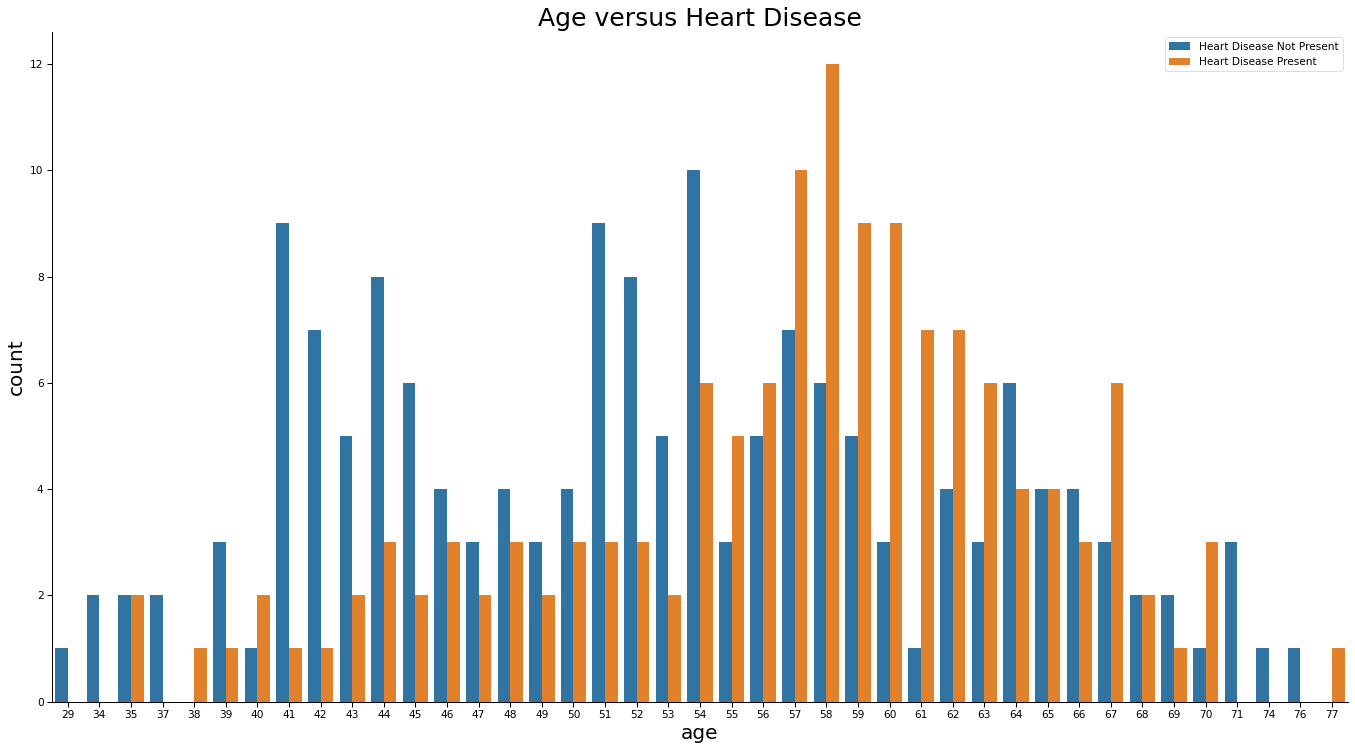

In [14]:
#Age and Heart Disease
sns.set_context("paper", font_scale = 1.2, rc = {"font.size": 15,"axes.titlesize": 25,"axes.labelsize": 20}) 
g = sns.catplot(kind = 'count', data = data, x = 'age', hue = 'num', order = data['age'].sort_values().unique(), height=10, aspect=15/8, legend=False)
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1, 1))
xtick = data['age'].sort_values().unique()
g.set_xticklabels(xtick.astype(int))
plt.title('Age versus Heart Disease')
plt.show()

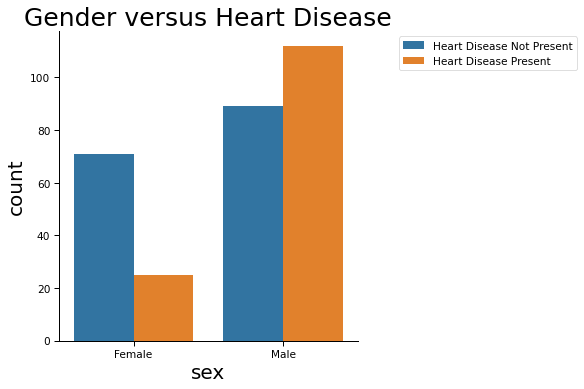

In [15]:
#Gender and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'sex', hue = 'num', legend=False)
plt.xticks([0,1],['Female','Male'])
plt.title('Gender versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()

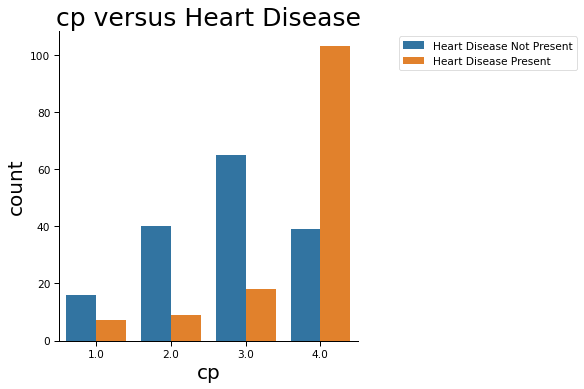

cp Value 1: typical angina
cp Value 2: atypical angina
cp Value 3: non-anginal pain
cp Value 4: asymptomatic


In [16]:
#cp and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'cp', hue = 'num', legend=False)
plt.title('cp versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()
print("cp Value 1: typical angina")
print("cp Value 2: atypical angina")
print("cp Value 3: non-anginal pain")
print("cp Value 4: asymptomatic")

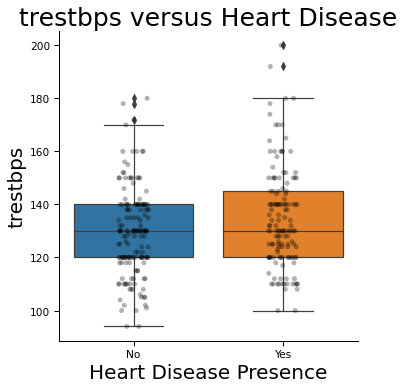

trestbps: resting blood pressure (in mm Hg on admission to the hospital)
num
0    129.175000
1    134.635036
Name: trestbps, dtype: float64


In [17]:
#trestbps and Heart Disease
sns.catplot(data = data, x='num', y='trestbps', kind="box")
sns.stripplot(data = data, x='num', y='trestbps', alpha=0.3, color='k')
plt.title('trestbps versus Heart Disease')
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()
print("trestbps: resting blood pressure (in mm Hg on admission to the hospital)")
means = data.groupby('num')['trestbps'].mean()
print (means)

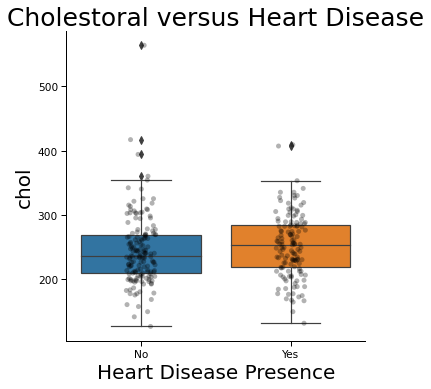

chol: serum cholestoral in mg/dl
Averages:
 num
0    243.493750
1    251.854015
Name: chol, dtype: float64


In [18]:
#Cholestoral and Heart Disease
sns.catplot(data = data, x = 'num', y = 'chol', kind="box")
sns.stripplot(data = data, x='num', y='chol', alpha=0.3, color='k')
plt.title('Cholestoral versus Heart Disease')
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()
print("chol: serum cholestoral in mg/dl")
means = data.groupby('num')['chol'].mean()
print ('Averages:\n', means)

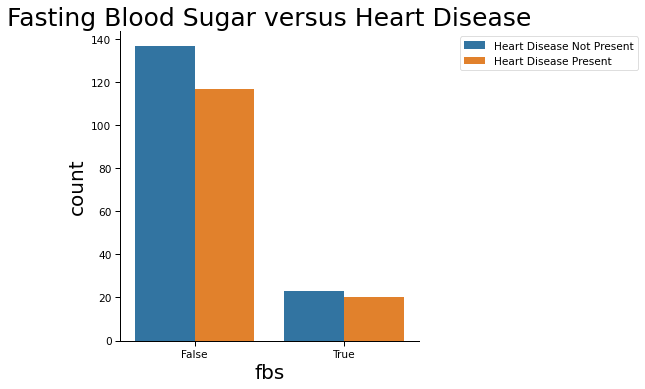

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


In [19]:
#fbs and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'fbs', hue = 'num', legend=False)
plt.xticks([0,1],['False','True'])
plt.title('Fasting Blood Sugar versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()
print("fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)")

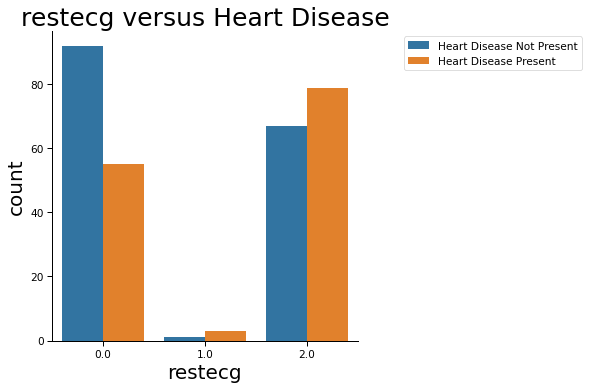

restecg: resting electrocardiographic results
restecg Value 0: normal
restecg Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
restecg Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


In [20]:
#Resting Electrocardiographic and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'restecg', hue = 'num', legend=False)
plt.title('restecg versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()
print("restecg: resting electrocardiographic results")
print("restecg Value 0: normal")
print("restecg Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) ")
print("restecg Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria")

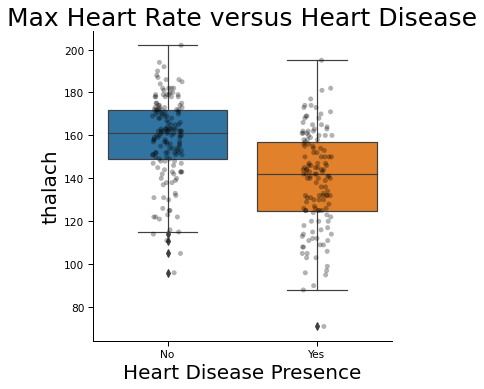

thalach: maximum heart rate achieved
Averages:
 num
0    158.581250
1    139.109489
Name: thalach, dtype: float64


In [21]:
#Max Heart Rate and Heart Disease
sns.catplot(data = data, x = 'num', y = 'thalach', kind="box")
sns.stripplot(data = data, x='num', y='thalach', alpha=0.3, color='k')
plt.title('Max Heart Rate versus Heart Disease')
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()
print("thalach: maximum heart rate achieved")
means = data.groupby('num')['thalach'].mean()
print ('Averages:\n', means)

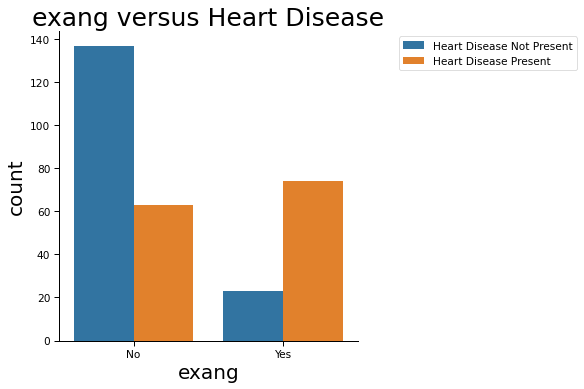

exang: exercise induced angina (1 = yes; 0 = no) 


In [22]:
#Exercise Induced Angina and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'exang', hue = 'num', legend=False)
plt.xticks([0,1],['No','Yes'])
plt.title('exang versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()
print("exang: exercise induced angina (1 = yes; 0 = no) ")

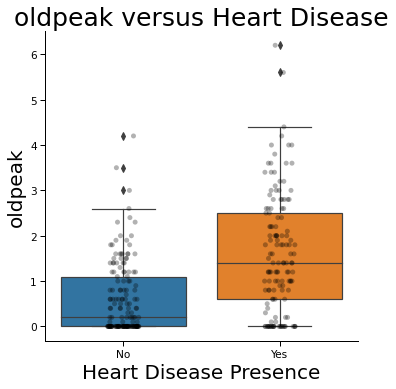

oldpeak = ST depression induced by exercise relative to rest
Averages:
 num
0    0.598750
1    1.589051
Name: oldpeak, dtype: float64


In [23]:
#oldpeak and Heart Disease
sns.catplot(data = data, x = 'num', y = 'oldpeak', kind="box")
sns.stripplot(data = data, x='num', y='oldpeak', alpha=0.3, color='k')
plt.title('oldpeak versus Heart Disease')
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()
print("oldpeak = ST depression induced by exercise relative to rest")
means = data.groupby('num')['oldpeak'].mean()
print ('Averages:\n', means)

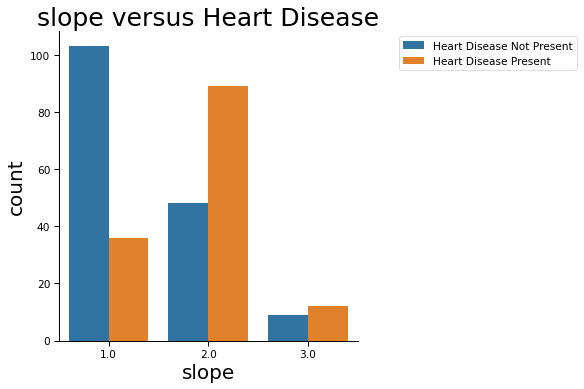

slope: the slope of the peak exercise ST segment


In [24]:
#slope and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'slope', hue = 'num', legend=False)
plt.title('slope versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()
print("slope: the slope of the peak exercise ST segment")

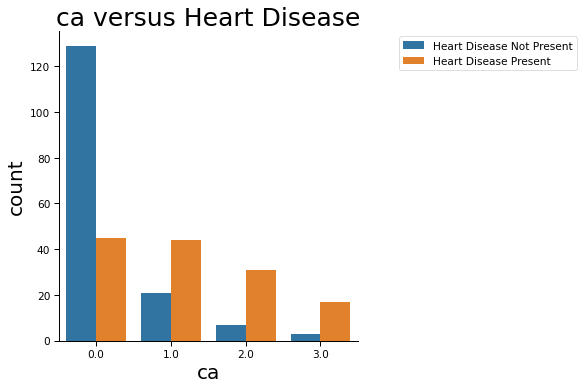

ca: number of major vessels (0-3) colored by flourosopy


In [25]:
#ca and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'ca', hue = 'num', legend=False)
plt.title('ca versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()
print("ca: number of major vessels (0-3) colored by flourosopy")

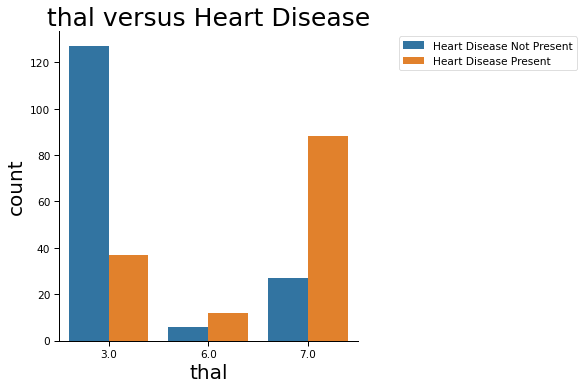

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [26]:
#thal and Heart Disease
sns.catplot(kind = 'count', data = data, x = 'thal', hue = 'num', legend=False)
plt.title('thal versus Heart Disease')
plt.legend(['Heart Disease Not Present', 'Heart Disease Present'],loc='upper right', bbox_to_anchor=(1.75, 1))
plt.show()
print("thal: 3 = normal; 6 = fixed defect; 7 = reversable defect")

## Models

We will assess 5 different models and tune parameters for each one using the grid search technique with cross validation. The best hyperparameters for each model will be stored in a collection called best_models.

In [27]:
best_models = {"SVC":None, "DecisionTree": None, "RandomForest": None, "NeuralNetwork": None, "KNN": None}

### SVC

In [28]:
clf_SVC = SVC()
parameters = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10 , 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10 , 100, 1000]
}
SVC = GridSearchCV(clf_SVC, parameters)
SVC.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'sigmoid']})

In [29]:
print(SVC.best_estimator_)
print(SVC.best_params_)
print(SVC.best_score_)

SVC(C=1000, gamma=0.001, kernel='sigmoid')
{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.8305851063829787


In [30]:
best_models["SVC"] = SVC.best_estimator_
print(best_models)

{'SVC': SVC(C=1000, gamma=0.001, kernel='sigmoid'), 'DecisionTree': None, 'RandomForest': None, 'NeuralNetwork': None, 'KNN': None}


### Decision Tree

In [31]:
clf_DT = DecisionTreeClassifier()
parameters = {
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10],
    'max_leaf_nodes': [2, 4, 6, 8, 10]
}
DecisionTree = GridSearchCV(clf_DT, parameters)
DecisionTree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_leaf_nodes': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [32]:
print(DecisionTree.best_estimator_)
print(DecisionTree.best_params_)
print(DecisionTree.best_score_)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, splitter='random')
{'max_depth': 10, 'max_leaf_nodes': 8, 'splitter': 'random'}
0.8179964539007093


In [33]:
best_models["DecisionTree"] = DecisionTree.best_estimator_
print(best_models)

{'SVC': SVC(C=1000, gamma=0.001, kernel='sigmoid'), 'DecisionTree': DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, splitter='random'), 'RandomForest': None, 'NeuralNetwork': None, 'KNN': None}


### Random Forest Classifier

In [34]:
clf_RF = RandomForestClassifier()
parameters = {
    'n_estimators': [20, 40, 60, 80, 100, 120],
    'max_depth': [1, 2, 3, 4, 5, 6]
}
RandomForest = GridSearchCV(clf_RF, parameters)
RandomForest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [20, 40, 60, 80, 100, 120]})

In [35]:
print(RandomForest.best_estimator_)
print(RandomForest.best_params_)
print(RandomForest.best_score_)

RandomForestClassifier(max_depth=2, n_estimators=80)
{'max_depth': 2, 'n_estimators': 80}
0.8431737588652484


In [36]:
best_models["RandomForest"] = RandomForest.best_estimator_
print(best_models)

{'SVC': SVC(C=1000, gamma=0.001, kernel='sigmoid'), 'DecisionTree': DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, splitter='random'), 'RandomForest': RandomForestClassifier(max_depth=2, n_estimators=80), 'NeuralNetwork': None, 'KNN': None}


### Neural Network

In [37]:
clf_NN = MLPClassifier(max_iter=500)
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50,50,), (100,100,)],
    'learning_rate': ['adaptive','invscaling'],
    'activation': ['relu','logistic']}
NN = GridSearchCV(clf_NN, parameters)
NN.fit(X_train, y_train)

C:\Users\gvan9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gvan9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gvan9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gvan9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gvan9\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)],
                         'learning_rate': ['adaptive', 'invscaling']})

In [38]:
print(NN.best_estimator_)
print(NN.best_params_)
print(NN.best_score_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate='invscaling', max_iter=500)
{'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling'}
0.813741134751773


In [39]:
best_models["NeuralNetwork"] = NN.best_estimator_
print(best_models)

{'SVC': SVC(C=1000, gamma=0.001, kernel='sigmoid'), 'DecisionTree': DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, splitter='random'), 'RandomForest': RandomForestClassifier(max_depth=2, n_estimators=80), 'NeuralNetwork': MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate='invscaling', max_iter=500), 'KNN': None}


### KNN


In [40]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 3, 5, 7, 8, 9, 11, 15],
    'leaf_size':[1,3,5,7,9,11,13,17,23,30],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]
}
gs_knn = GridSearchCV(knn, parameters)
gs_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 9, 11, 13, 17, 23, 30],
                         'n_jobs': [-1],
                         'n_neighbors': [1, 3, 5, 7, 8, 9, 11, 15]})

In [41]:
print(gs_knn.best_estimator_)
print(gs_knn.best_params_)
print(gs_knn.best_score_)

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=11)
{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 11}
0.801063829787234


In [42]:
best_models["KNN"] = gs_knn.best_estimator_
print(best_models)

{'SVC': SVC(C=1000, gamma=0.001, kernel='sigmoid'), 'DecisionTree': DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, splitter='random'), 'RandomForest': RandomForestClassifier(max_depth=2, n_estimators=80), 'NeuralNetwork': MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate='invscaling', max_iter=500), 'KNN': KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=11)}


## Evaluating the Models

### Metrics on Training Data
First we will evaluate the different models on the training data to determine which model we will use on the test data.

In [43]:
#Create a function that will print out the metrics for each model
#Return the model, accuracy and recall. See the "Conclusion" section of the write-up for reasons why we chose these metrics.
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    confusion = confusion_matrix(labels, pred)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    df_confusion = pd.DataFrame(confusion, columns = ['Pred_Neg' , 'Pred_Pos'], index=['Actual_Neg' , 'Actual_Pos'])
    print(name)
    print('Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(accuracy, 
                                                                                   precision, recall, 
                                                                                   round((end - start)*1000, 2)))
    print('\nConfusion Matrix:\n', df_confusion)
    print('\nClassification Report:\n', classification_report(labels, pred))
    print('\n')
    print('\n')
    return name, accuracy, recall

#Save the accuracies and recall score
train_results = []
for name, mdl in best_models.items():
    result = evaluate_model(name, mdl, X_train, y_train)
    train_results.append(result)

SVC
Accuracy: 0.848 / Precision: 0.854 / Recall: 0.807 / Latency: 0.0ms

Confusion Matrix:
             Pred_Neg  Pred_Pos
Actual_Neg       113        15
Actual_Pos        21        88

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       128
           1       0.85      0.81      0.83       109

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237





DecisionTree
Accuracy: 0.848 / Precision: 0.884 / Recall: 0.771 / Latency: 0.0ms

Confusion Matrix:
             Pred_Neg  Pred_Pos
Actual_Neg       117        11
Actual_Pos        25        84

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       128
           1       0.88      0.77      0.82       109

    accuracy                           0.85       237
   macro avg       0.8

### Metrics on Test Data
Next, we will evaluate all the model's performances on the test data.

In [44]:
#Save the accuracies and recall score
test_results = []
for name, mdl in best_models.items():
    result = evaluate_model(name, mdl, X_test, y_test)
    test_results.append(result)

SVC
Accuracy: 0.867 / Precision: 0.917 / Recall: 0.786 / Latency: 0.0ms

Confusion Matrix:
             Pred_Neg  Pred_Pos
Actual_Neg        30         2
Actual_Pos         6        22

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60





DecisionTree
Accuracy: 0.833 / Precision: 1.0 / Recall: 0.643 / Latency: 0.0ms

Confusion Matrix:
             Pred_Neg  Pred_Pos
Actual_Neg        32         0
Actual_Pos        10        18

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       1.00      0.64      0.78        28

    accuracy                           0.83        60
   macro avg       0.88 

### Graph of Results

In [45]:
#For this data set we are just going to evaluate the models based on Accuracy and Recall
from pandas import DataFrame
train_results_df = DataFrame (train_results,columns=['Models','Accuracy','Recall'])
test_results_df = DataFrame (test_results,columns=['Models','Accuracy','Recall'])
print("Training Results\n")
print(train_results_df)
print("\n")
print("Test Results\n")
print(test_results_df)

Training Results

          Models  Accuracy  Recall
0            SVC     0.848   0.807
1   DecisionTree     0.848   0.771
2   RandomForest     0.865   0.798
3  NeuralNetwork     0.844   0.817
4            KNN     0.840   0.798


Test Results

          Models  Accuracy  Recall
0            SVC     0.867   0.786
1   DecisionTree     0.833   0.643
2   RandomForest     0.833   0.714
3  NeuralNetwork     0.850   0.821
4            KNN     0.817   0.750


Text(0.5, 1.0, 'Results on Test Data')

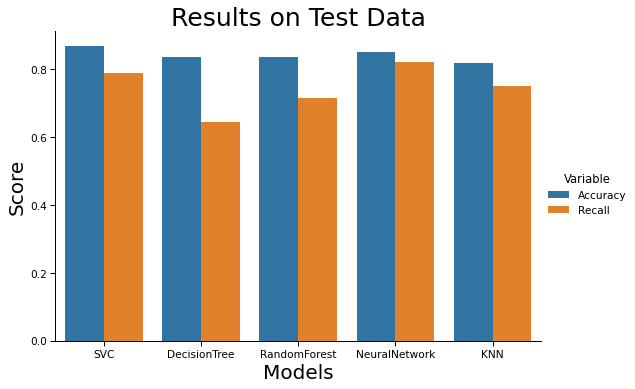

In [46]:
#Graph both the accuracy and recall of the test results for each model
tidy = test_results_df.melt(id_vars='Models').rename(columns=str.title) #First restructure the data with melt so it is easier to plot.
g = sns.catplot(x="Models", y="Value", hue="Variable", kind="bar", data=tidy, aspect=1.5)
g.set(ylabel='Score')
plt.title('Results on Test Data')

Text(0.5, 1.0, 'Training and Testing Accuracies')

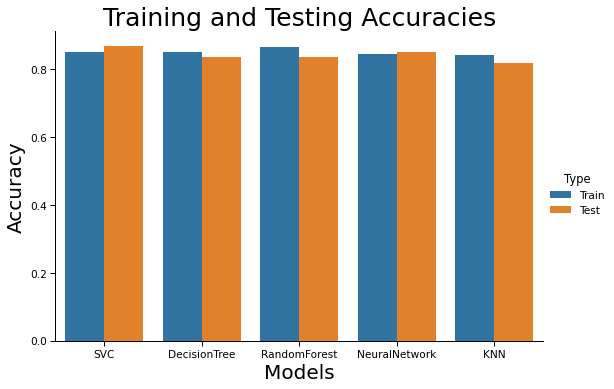

In [47]:
#Graph the accuracies for both the training and test data for each model.
#First will combine the results for both the training and test data.
ds_type = ['Train'] * 5
train_results_df['Type'] = ds_type
ds_type = ['Test'] * 5
test_results_df['Type'] = ds_type
results_df = pd.concat([train_results_df, test_results_df])
sns.catplot(x="Models", y="Accuracy", hue="Type", kind="bar", data=results_df, aspect=1.5)
plt.title('Training and Testing Accuracies')

## Conclusion

When comparing results of different models, it is important to understand the data and problem that is being analyzed. Since this dataset is determining whether or not heart disease is present or not in a patient, it is very important and much more critical that our classifier does NOT mislabel someone with heart disease as not having it present than to mislabel someone without heart disease as having some presence of it. This means that recall is much more important than precision as we would rather be more conservative and error on the side of labeling more patients with some level of heart disease so that we do not miss possible treatments. Being more conservative will mean that we have more false positives but the patient can always seek out more medical test to validate if they actually have heart disease. This is better than the alternative of having a patient miss early detection and treatment because of a false negative result.

In this particular dataset, the neural network model had the highest score in recall for the test results and also scored comparatively high in accuracy as well. Weighing out accuracy metrics are far more important in a heavily imbalanced dataset such as prediction of cancer where most of the dataset labels are usually noncancerous. The ground truth split for our data was 160 instances of no heart disease and 137 instances of some kind of presence of heart disease which means the data is split fairly well. As a consequence, the accuracy, macro average and weighted average are within 1% of each other for every model's results. 

Some improvements for our model could be to train on more data since we only trained on a dataset of around 190 instances after the split. We can also simplify our data and avoid overfitting by using feature reduction methods such as lasso and ridge regularization or using dimensionality reduction methods such as Principal Component Analysis (PCA).